In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


plt.style.use("seaborn-v0_8-darkgrid")

### O treinamento de um modelo de regressão linear



In [2]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

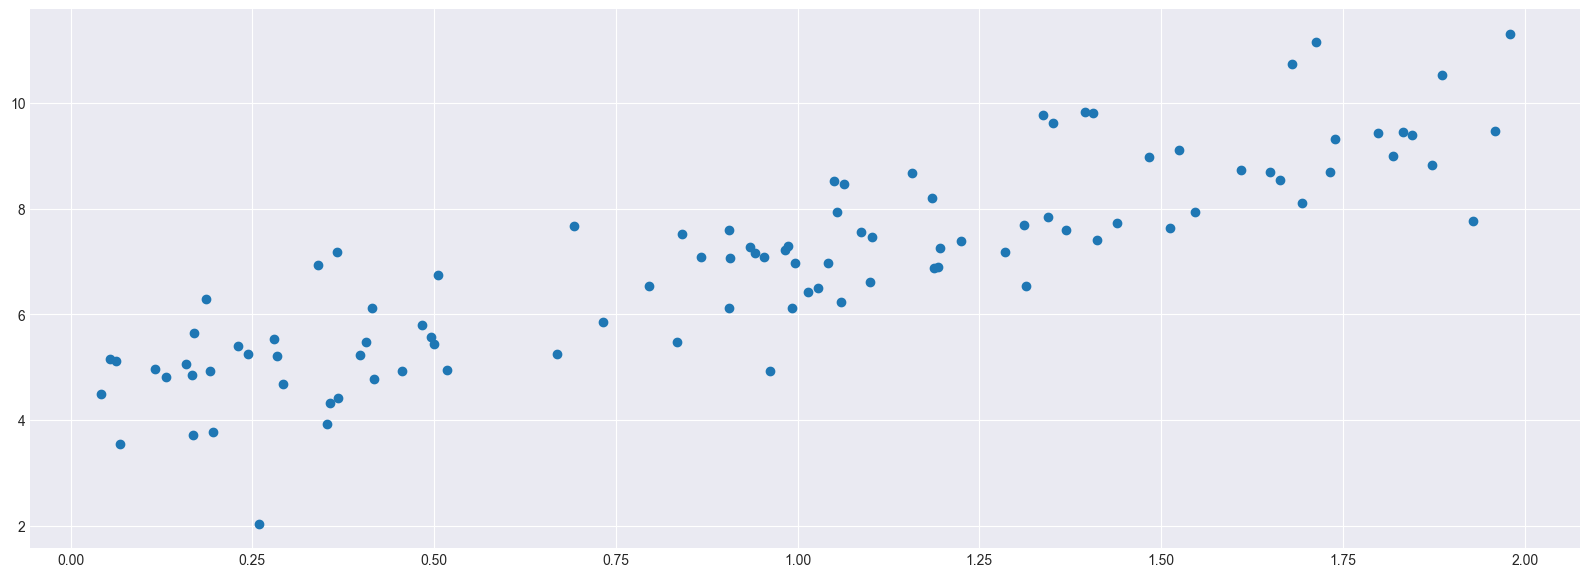

In [3]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

In [38]:
x_b = np.c_[np.ones((100, 1)), x]
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y) # theta são os parametros da formula da equacao normal (mse) para resolução de regressões lineares - solução analitica

x_b

array([[ 1.        ,  2.76015059],
       [ 1.        , -1.75190314],
       [ 1.        , -1.76473985],
       [ 1.        , -0.23108017],
       [ 1.        ,  1.90075569],
       [ 1.        ,  1.39880246],
       [ 1.        ,  1.89886917],
       [ 1.        ,  0.6911258 ],
       [ 1.        , -2.94912225],
       [ 1.        ,  2.88550896],
       [ 1.        ,  0.73264541],
       [ 1.        , -0.75359389],
       [ 1.        ,  0.24862586],
       [ 1.        ,  0.78012606],
       [ 1.        ,  2.94661048],
       [ 1.        , -0.28956949],
       [ 1.        , -1.82036395],
       [ 1.        ,  0.73581196],
       [ 1.        ,  1.17155593],
       [ 1.        ,  1.41940126],
       [ 1.        , -0.2854215 ],
       [ 1.        , -1.88607429],
       [ 1.        ,  0.56469235],
       [ 1.        ,  2.57984505],
       [ 1.        , -0.78306451],
       [ 1.        ,  1.22984987],
       [ 1.        ,  2.25467662],
       [ 1.        , -2.59823072],
       [ 1.        ,

In [16]:
theta

array([[4.2554912 ],
       [2.83891902]])

In [17]:
y_hat = theta[0] + x * theta[1] # equacao normal para resolução de regressões lineares

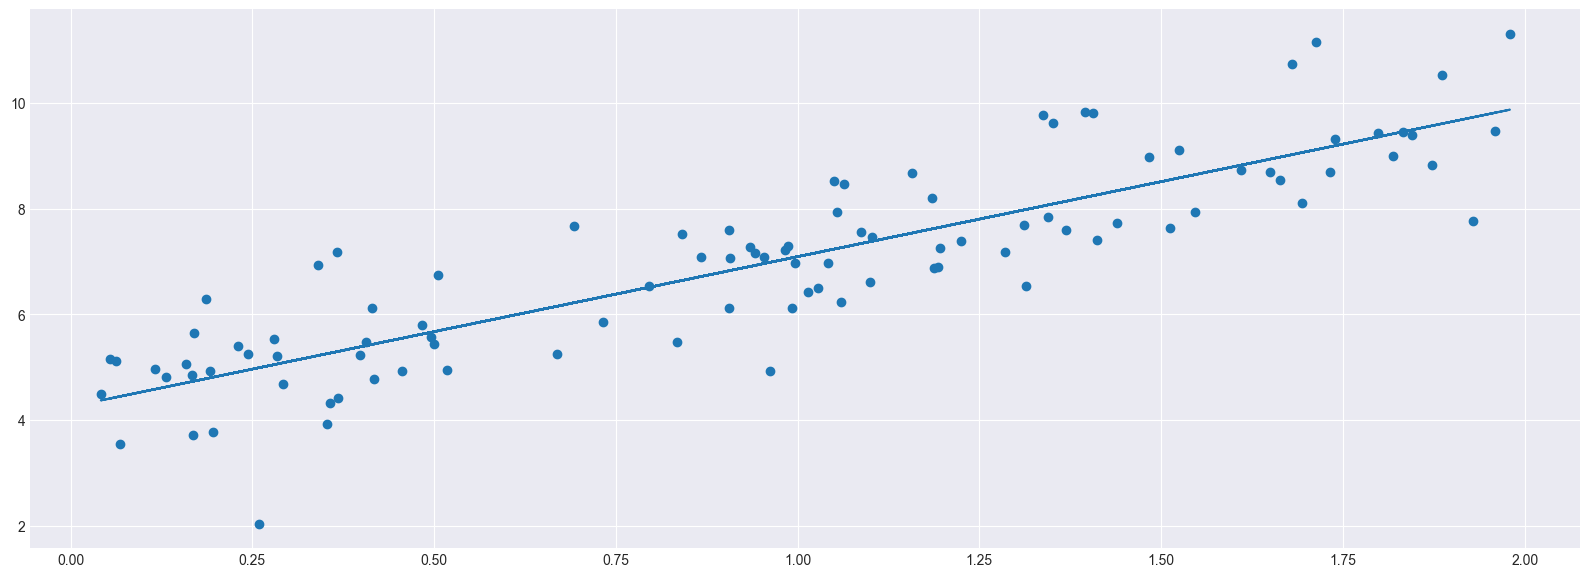

In [7]:
fig, ax = plt.subplots(figsize=(20, 7))
plt.plot(x, y_hat)
plt.scatter(x, y)

### Regressão linear no sklearn

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.2554912]), array([[2.83891902]]))

## Batch Gradient Descent

Text(0.5, 1.0, 'Eta: 0.1')

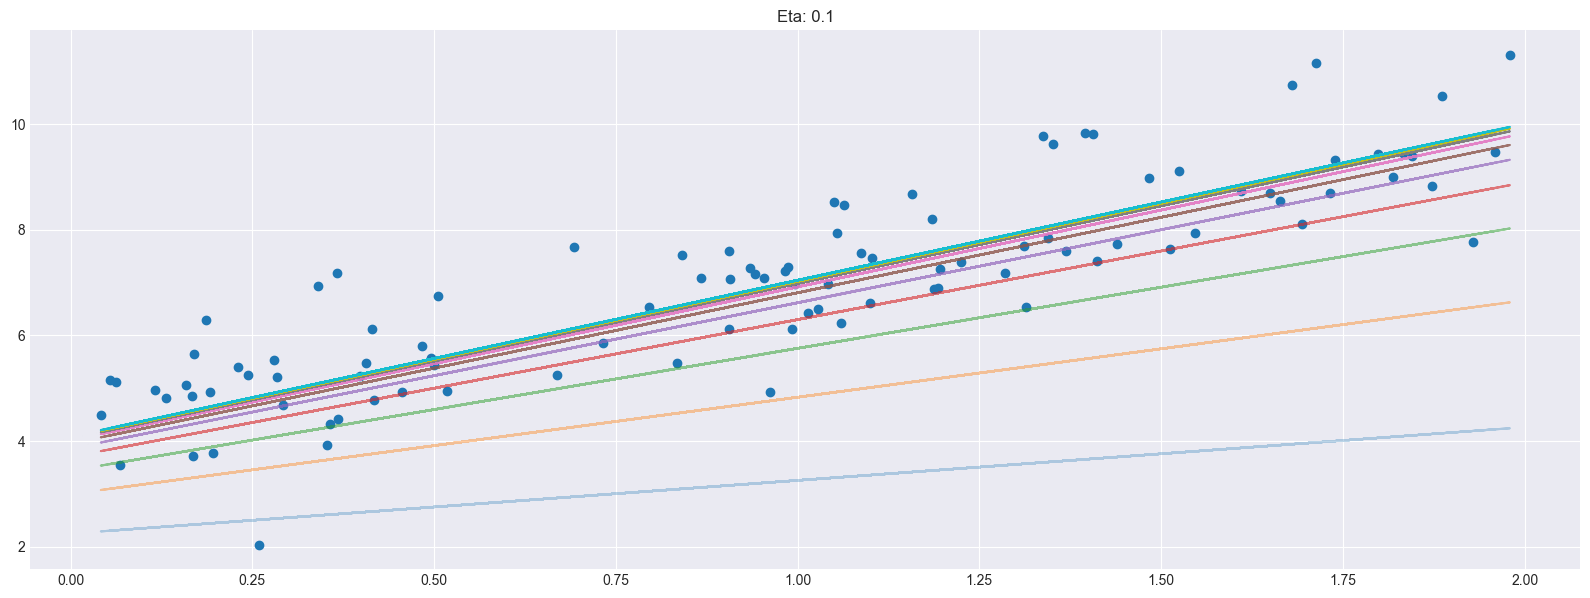

In [28]:
eta = 0.1  # learning rate
n_iterations = 10
m = 100

theta = np.random.randn(2,1)  # random initialization
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y) # derivada da solucao analitica (theta - parametros) feitas anteriormente
    theta = theta - eta * gradients
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=min(0.3 + iteration / n_iterations,1))
ax.set_title("Eta: {}".format(eta))

Text(0.5, 1.0, 'Eta: 0.01')

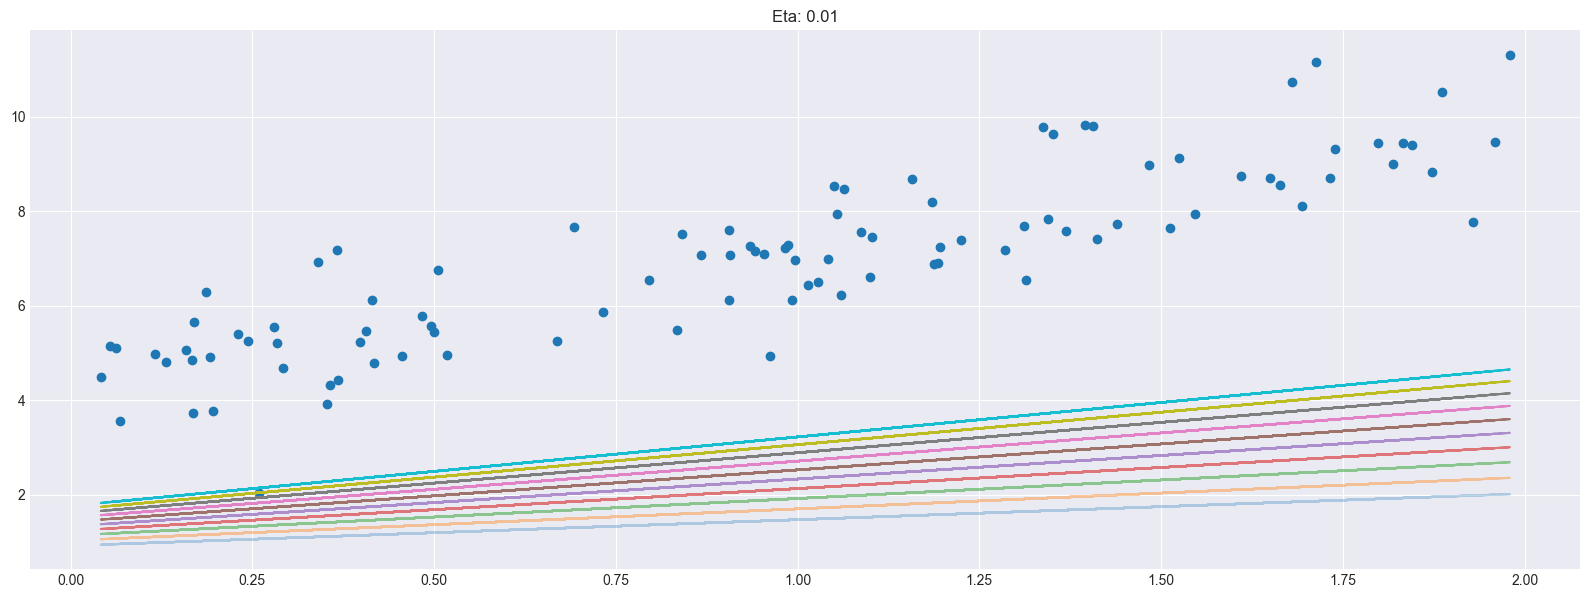

In [29]:
eta = 0.01  # learning rate
n_iterations = 10
m = 100

theta = np.random.randn(2,1)  # random initialization
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y) # derivada da solucao analitica (theta - parametros) feitas anteriormente
    theta = theta - eta * gradients
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=min(0.3 + iteration / n_iterations,1))
ax.set_title("Eta: {}".format(eta))

Text(0.5, 1.0, 'Eta: 1')

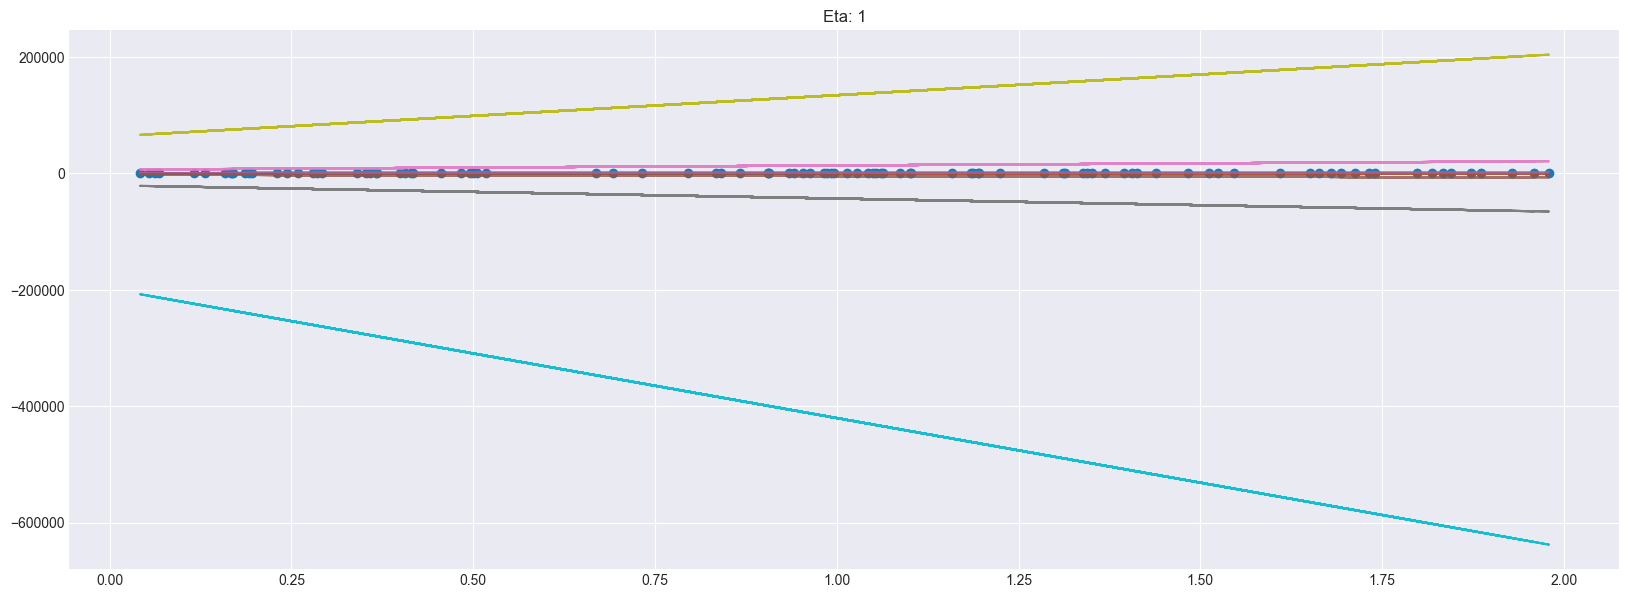

In [31]:
eta = 1  # learning rate
n_iterations = 10
m = 100

theta = np.random.randn(2,1)  # random initialization
fig, ax = plt.subplots(figsize=(20, 7))
plt.scatter(x, y)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y) # derivada da solucao analitica (theta - parametros) feitas anteriormente
    theta = theta - eta * gradients
    
    if iteration % 1 == 0:
        y_hat = theta[0] + x * theta[1]
        ax.plot(x, y_hat, alpha=min(0.3 + iteration / n_iterations,1))
ax.set_title("Eta: {}".format(eta))

### Regressão polinomial

In [32]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

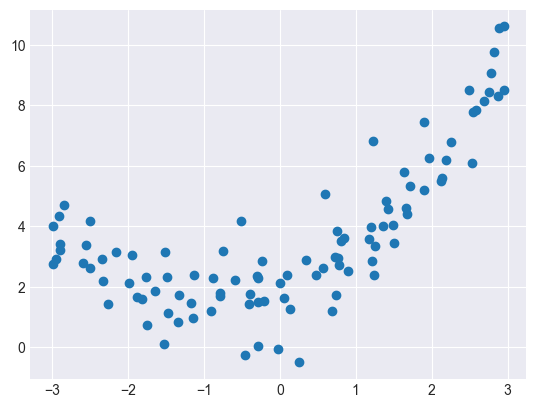

In [33]:
plt.scatter(x, y)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

In [37]:
x_poly

array([[ 2.76015059e+00,  7.61843129e+00],
       [-1.75190314e+00,  3.06916461e+00],
       [-1.76473985e+00,  3.11430673e+00],
       [-2.31080168e-01,  5.33980440e-02],
       [ 1.90075569e+00,  3.61287219e+00],
       [ 1.39880246e+00,  1.95664833e+00],
       [ 1.89886917e+00,  3.60570412e+00],
       [ 6.91125805e-01,  4.77654878e-01],
       [-2.94912225e+00,  8.69732206e+00],
       [ 2.88550896e+00,  8.32616199e+00],
       [ 7.32645414e-01,  5.36769303e-01],
       [-7.53593895e-01,  5.67903758e-01],
       [ 2.48625858e-01,  6.18148170e-02],
       [ 7.80126056e-01,  6.08596663e-01],
       [ 2.94661048e+00,  8.68251334e+00],
       [-2.89569486e-01,  8.38504875e-02],
       [-1.82036395e+00,  3.31372492e+00],
       [ 7.35811964e-01,  5.41419247e-01],
       [ 1.17155593e+00,  1.37254329e+00],
       [ 1.41940126e+00,  2.01469993e+00],
       [-2.85421499e-01,  8.14654323e-02],
       [-1.88607429e+00,  3.55727624e+00],
       [ 5.64692352e-01,  3.18877452e-01],
       [ 2.

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.8904116]), array([[0.9473412, 0.541504 ]]))

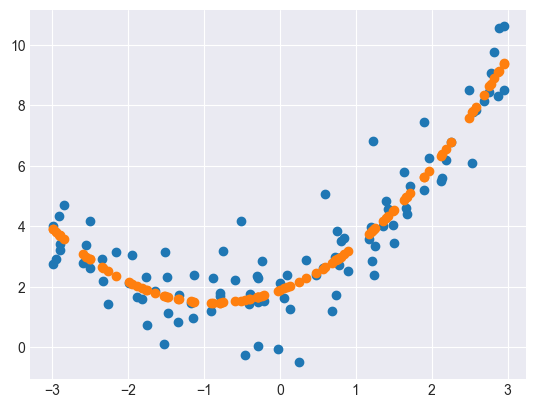

In [39]:
plt.scatter(x, y)
plt.scatter(x, lin_reg.predict(x_poly))

### O que acontece se a complexidade do modelo for aumentada desnecessariamente?

(-4.0, 4.0)

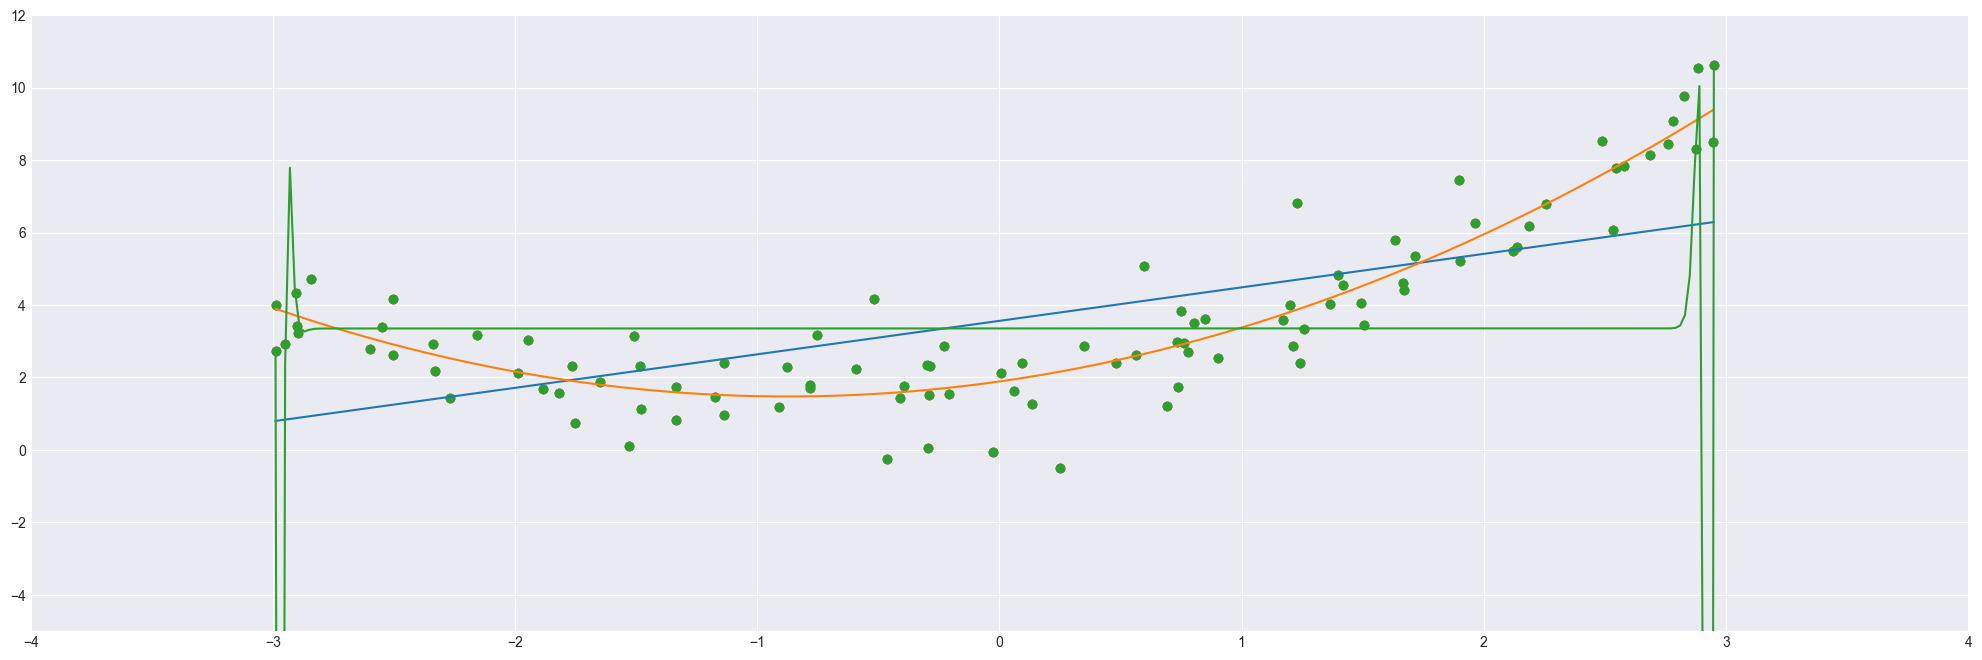

In [43]:
fig, ax = plt.subplots(figsize=(25, 8))
for degree in [1, 2, 300]:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)  
    
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, lin_reg.predict(x_seq_transf), label=degree)
ax.set_ylim([-5, 12])
ax.set_xlim([-4, 4])

### Ridge Regression

In [ ]:
m = 100
x = np.random.rand(m, 1) - 3
y = np.random.randn(m, 1)

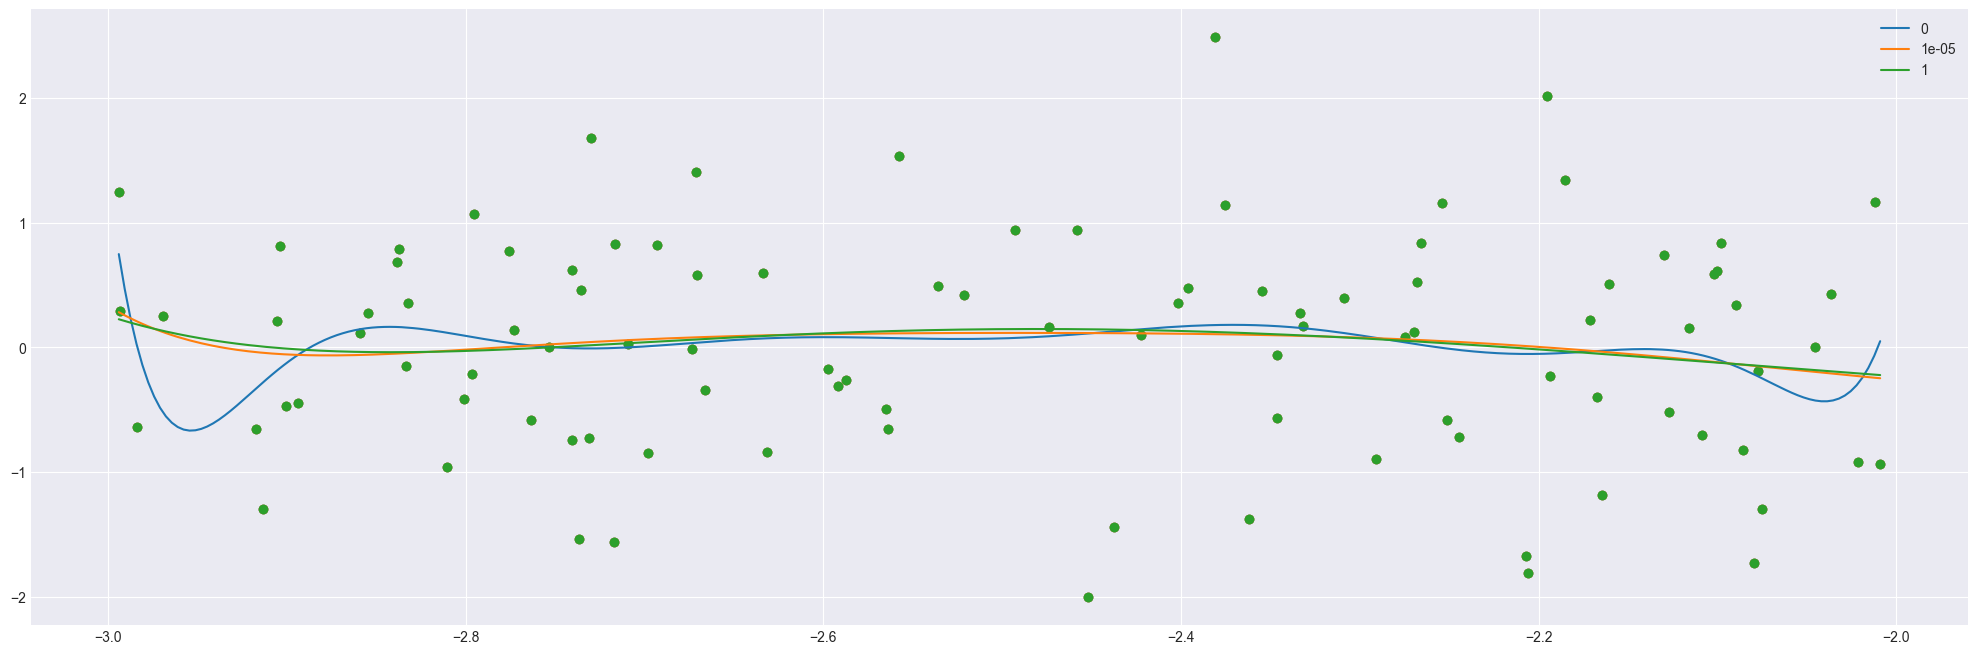

In [46]:
from sklearn.linear_model import Ridge

fig, ax = plt.subplots(figsize=(25, 8))
for alpha in [0, 1e-5, 1]:
    poly_features = PolynomialFeatures(degree=10, include_bias=False)
    x_poly = poly_features.fit_transform(x)
    x_seq = np.linspace(x.min(), x.max(), 300).reshape(-1,1)
    
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(x_poly, y)  
    
    plt.scatter(x, y)
    x_seq_transf = poly_features.fit_transform(x_seq)
    plt.plot(x_seq, ridge_reg.predict(x_seq_transf), label=alpha)
ax.legend()

### Regressão Logística

Método de classificação binário

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [56]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
x = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(int) # iris virginica

In [50]:
x

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [ ]:
y # igual a 1 é virginica, igual a 0 não é virginica

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [52]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression()

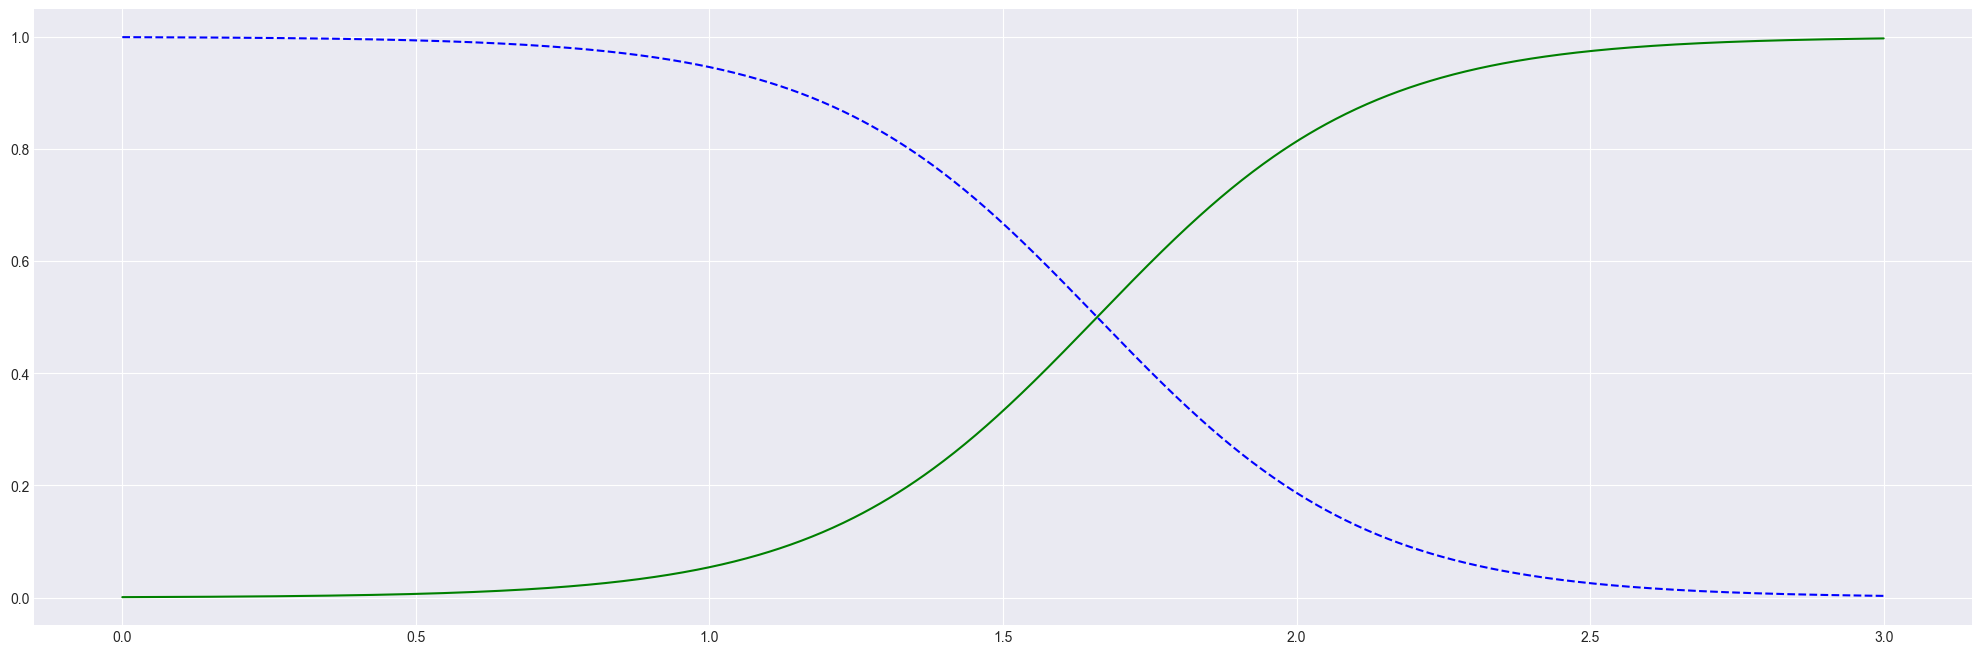

In [ ]:
fig, ax = plt.subplots(figsize=(25, 8))
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica") # green
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica") # blue

### Softmax Regression

In [59]:
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(x, y)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial')

In [60]:
0.5 * np.log(1/0.5) + 0.5 * np.log(1/0.5)

np.float64(0.6931471805599453)

In [61]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([[6.21626374e-07, 5.73689802e-02, 9.42630398e-01]])

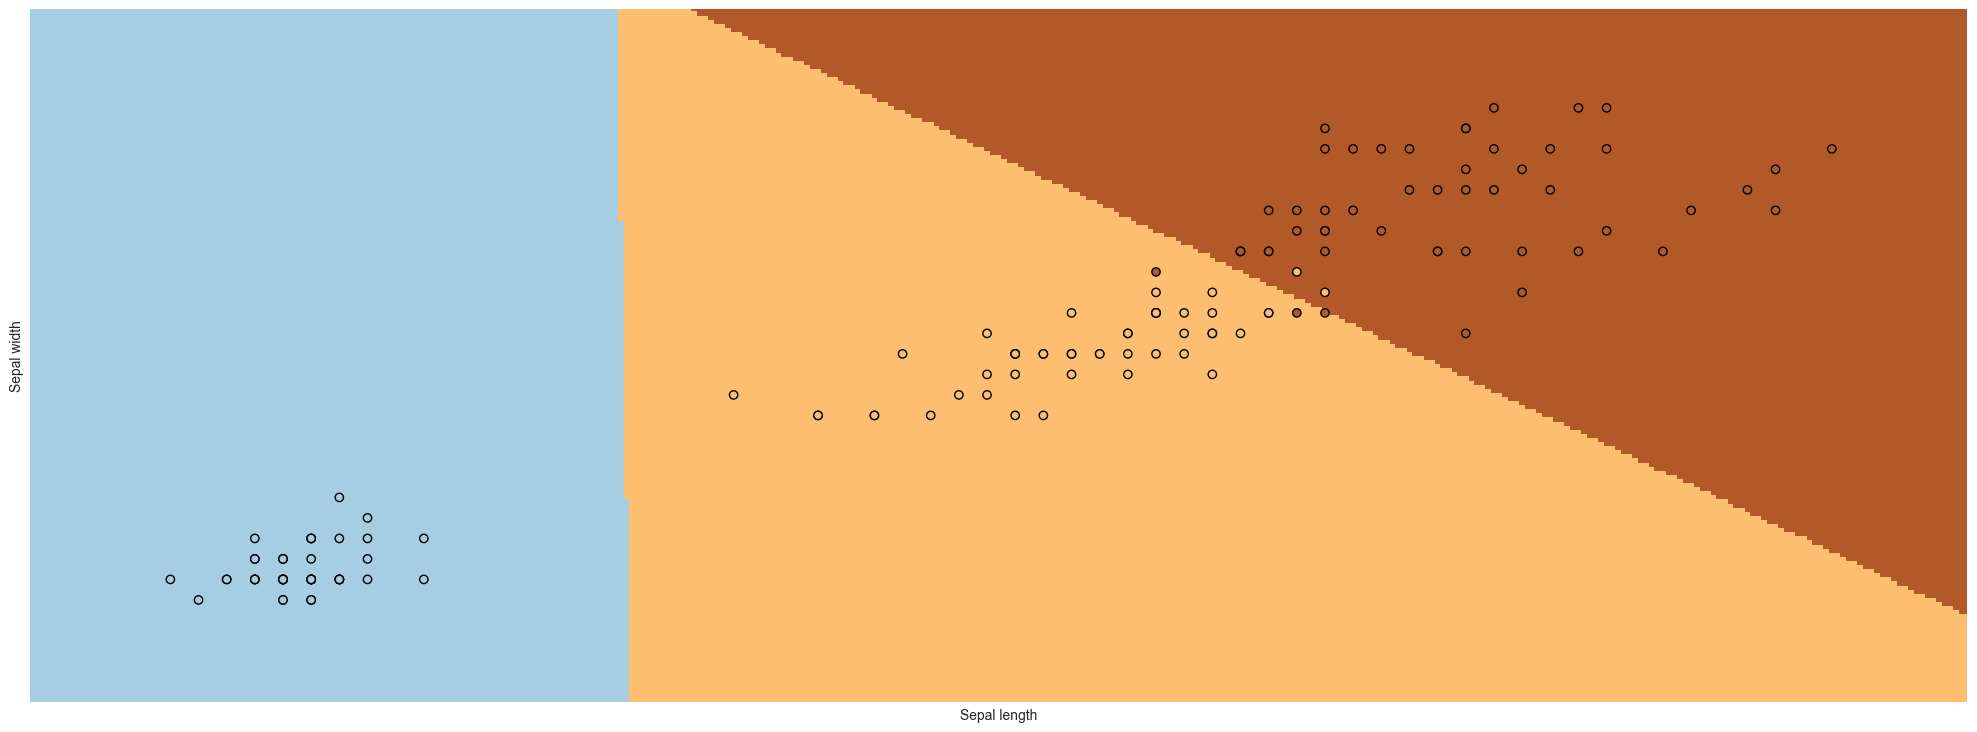

In [65]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
h = 0.02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(25, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()